<!-- File automatically generated using DocOnce (https://github.com/doconce/doconce/):
doconce format ipynb LinearRegression.do.txt  -->

## Linear regression with neurons
We begin by importing some packages that can help us analyse and visualize
data.

In [53]:
%matplotlib inline

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4, 2)
plt.rcParams['figure.dpi'] = 150

## Linear regression
The aim of linear regression is to find the straight line that best fits the data $D = (x_1,y)$. 
This boils down to assuming a linear relationship $y = slope\, x_1 + intercept$ and finding the
$slope$ and $intercept$ which makes the estimated $\hat{y}$ as close as possible to $y$.

## Training a linear rate neuron

<!-- dom:FIGURE: [figures/linear-rate-neuron.png] <div id="fig:linear-rate-neuron"></div> -->
<!-- begin figure -->
<div id="fig:linear-rate-neuron"></div>

<img src="figures/linear-rate-neuron.png" ><p style="font-size: 0.9em"><i>Figure 1</i></p>
<!-- end figure -->

If we define $\sigma(x)=x$ we see that the output corresponds to a straight line $\hat{y}=\sigma(z)=w_0 + w_1x_1$.
Think about these as numbers i.e. $w_0,w_1,x_1\in\mathbb{R}$ that flow through the neuron one by one.
We now have to fit the weights $w_0, w_1$ to the $intercept$ and $slope$ respectably. 
To do this we first need to define an objective function. 
Our objective is to make $\hat{y}$ and $y$ as close as possible which can be measured with the
square error, or "loss" $\mathcal{L}=\frac{1}{2}(y - \hat{y})^2$. 
When the loss is at its minimum the derivatives $\frac{\partial \mathcal{L}}{\partial w_0}$ and $\frac{\partial \mathcal{L}}{\partial w_1}$ are zero.

## Exercise 1: Compute the derivatives of the loss

We can now use the chain rule
$\frac{\partial \mathcal{L}}{\partial w} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z} \frac{\partial z}{\partial w}$ on the functions

$$
\begin{align*}
\mathcal{L} &= \frac{1}{2}(y - \hat{y})^2\\
\hat{y} &= z\\
z &= x_1w_1 + w_0
\end{align*}
$$

to derive a rule for minimizing the objective.

Find $\frac{\partial \mathcal{L}}{\partial w_0}$ and $\frac{\partial \mathcal{L}}{\partial w_1}$ using the chain rule.

<!-- --- begin solution of exercise --- -->
**Solution.**

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial \hat{y}} &= -(y - \hat{y}) \\
\frac{\partial \hat{y}}{\partial z} &= 1 \\
\frac{\partial z}{\partial w_0} &= 1 \\
\frac{\partial z}{\partial w_1} &= x_1 \\
\frac{\partial \mathcal{L}}{\partial w_0} &= -(y-\hat{y})\\
\frac{\partial \mathcal{L}}{\partial w_1} &= -x_1 (y-\hat{y})\\
\end{align*}
$$

<!-- --- end solution of exercise --- -->
To make notation a little easier we define $\mathbf{W} = (w_0, w_1)$ and the gradient as 
$\nabla_\mathbf{W}\mathcal{L}=(\frac{\partial \mathcal{L}}{\partial w_0},\frac{\partial \mathcal{L}}{\partial w_1})$.
Now we can do gradient descent by updating the weights by $\mathbf{W} = \mathbf{W} - \gamma \nabla_\mathbf{W}\mathcal{L}$.

## Making syntethic training data

In [54]:
# The number of training data
N = 200
# 200 random samples as our data
x_1 = np.random.rand(N)
# Define the line slope and the Gaussian noise parameters
slope = 3
intercept, sigma = 0, 0.1 # mean and standard deviation
intercepts = np.random.normal(intercept, sigma, N)
# Define the coordinates of the data points using the line equation and the added Gaussian noise 
y = slope * x_1 + intercepts

Text(0, 0.5, 'y (ground-truth)')

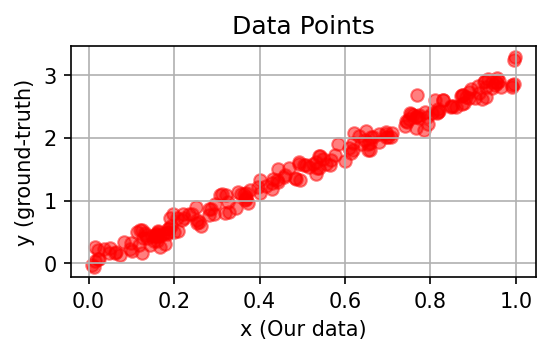

In [55]:
# Here we plot our generated training data
plt.scatter(x_1, y, c='r', alpha=0.5)
plt.grid()
plt.title('Data Points')
plt.xlabel('x (Our data)')
plt.ylabel('y (ground-truth)')

## Exercise 2: Linear regression with stochastic gradient descent

Perform gradient descent to estimate $intercept$ and $slope$ with $w_0,w_1$ as defined above.

**a)**
Define python functions for the gradients `dL_dw0`, `dl_dw1` and `loss_fn` by filling in the blanks "___"

In [56]:
def dL_dw0(y, y_hat):
    return -(y-y_hat)

def dL_dw1(y, y_hat, x_1):
    return -x_1 * (y - y_hat)

def loss_fn(y, y_hat):
    return (1/2) * (y-y_hat)**2

<!-- --- begin solution of exercise --- -->
**Solution.**

In [57]:
def dL_dw0(y, y_hat):
    return y_hat - y

def dL_dw1(y, y_hat, x_1):
    return x_1*(y_hat - y)

def loss_fn(y, y_hat):
    return 0.5*(y - y_hat)**2

<!-- --- end solution of exercise --- -->
Now we have to initialize our weights, lets pick some random numbers

In [58]:
w_0, w_1 = -5, 5

**b)**
Make a for loop that goes through the inputs in `x_1` and updates `y_hat` according to the loss using gradient descent.
Store the loss values for later usage

In [59]:
gamma = 0.1
losses = []
for x_1_val, y_val in zip(x_1, y):
    y_hat = w_0 + w_1*x_1_val
    loss = loss_fn(y_val, y_hat)
    w_0 = w_0 - gamma * dL_dw0(y_val, y_hat)
    w_1 = w_1 - gamma * dL_dw1(y_val, y_hat, x_1_val)
    losses.append(loss)

<!-- --- begin solution of exercise --- -->
**Solution.**

In [ ]:
gamma = 0.1
losses = []
for x_1_val, y_val in zip(x_1, y):
    y_hat = w_0 + w_1*x_1_val
    loss = loss_fn(y_val, y_hat)
    w_0 = w_0 - gamma*dL_dw0(y_val, y_hat)
    w_1 = w_1 - gamma*dL_dw1(y_val, y_hat, x_1_val)
    losses.append(loss)

<!-- --- end solution of exercise --- -->

**c)**
Plot the result superimposed on a scatter plot of the data

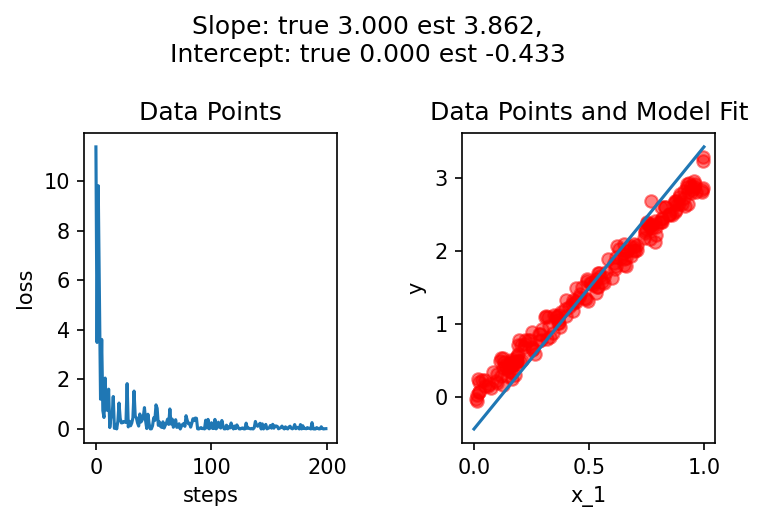

In [60]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(5,3.5))
# ---> Plot the loss <---
ax1.plot(losses)
ax1.set_title('Data Points')
ax1.set_xlabel('steps')
ax1.set_ylabel('loss')

# ---> Plot the data points (x_1,y) <---
ax2.scatter(x_1, y, c='r', alpha=0.5)
ax2.set_title('Data Points and Model Fit')
ax2.set_xlabel('x_1')
ax2.set_ylabel('y')

# ---> Plot the model fit in the same plot as the data points <---
x_grid = np.linspace(0,1,2)
ax2.plot(x_grid, w_0 + w_1*x_grid)
plt.suptitle(f'Slope: true {slope:.3f} est {w_1:.3f},\nIntercept: true {intercept:.3f} est {w_0:.3f}')
plt.tight_layout()

<!-- --- begin solution of exercise --- -->
**Solution.**

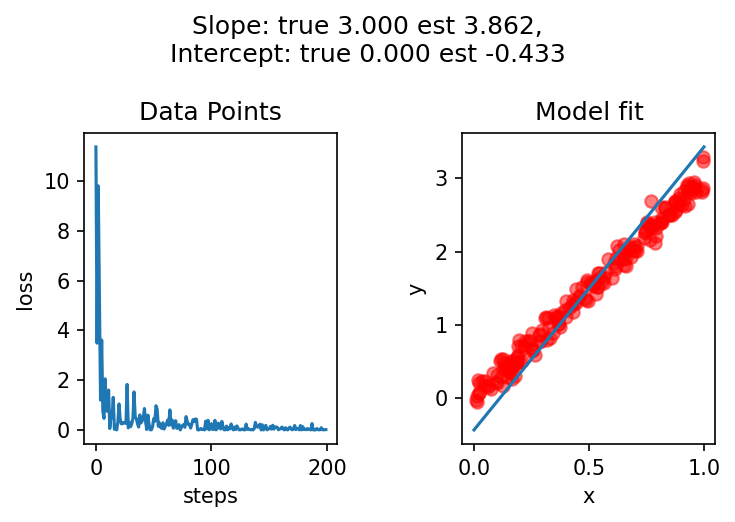

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(5,3.5))
ax1.plot(losses)
ax1.set_title('Data Points')
ax1.set_xlabel('steps')
ax1.set_ylabel('loss')
ax2.scatter(x_1, y, c='r', alpha=0.5)
ax2.set_title('Model fit')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
x_grid = np.linspace(0,1,2)
ax2.plot(x_grid, w_0 + w_1*x_grid)
plt.suptitle(f'Slope: true {slope:.3f} est {w_1:.3f},\nIntercept: true {intercept:.3f} est {w_0:.3f}')
plt.tight_layout()

<!-- --- end solution of exercise --- -->

As we can see the descent is stochastic, and does not converge to a stationary value. 
The reason is that we compute the loss once for every single input value. 
To mitigate this we can introduce the mean squared error $\mathcal{L} = \frac{1}{2n}\sum_i(y_i - \hat{y}_i)^2$. 
Here $n$ is the number of inputs, known as the batch size.

## Exercise 3: Stochastic gradient descent with batches and epochs

Perform gradient descent to estimate $intercept$ and $slope$ with $w_0,w_1$ as defined above.

**a)**
Define python functions for the gradients `batch_dL_dw0`, `batch_dl_dw1` and `batch_loss_fn`

<!-- --- begin solution of exercise --- -->
**Solution.**

In [62]:
def batch_dL_dw0(y, y_hat):
    return np.mean(-(y-y_hat))
def batch_dL_dw1(y, y_hat, x_1):
    return np.mean(-x_1 *(y-y_hat))
def batch_loss_fn(y, y_hat):
    return np.mean((1/2) * (y-y_hat)**2)

In [63]:
def batch_dL_dw0(y, y_hat):
    return np.mean(y_hat - y)

def batch_dL_dw1(y, y_hat, x_1):
    return np.mean(x_1*(y_hat - y))

def batch_loss_fn(y, y_hat):
    return 0.5*np.mean((y - y_hat)**2)

<!-- --- end solution of exercise --- -->

**b)**
Make a for loop that goes through the inputs in `x_1` and updates `y_hat` according to the loss using gradient descent.
Store the loss values for later usage

<!-- --- begin solution of exercise --- -->
**Solution.**

In [64]:
w_0, w_1 = -5, 5
gamma = 0.1
losses = []
n_epochs = 1000
n_batch = len(x_1)
batch_x_1 = [x_1[n:n + n_batch] for n in range(0, len(x_1), n_batch)]
batch_y = [y[n:n + n_batch] for n in range(0, len(y), n_batch)]

for epoch in range(n_epochs):
    for x_1_val, y_val in zip(batch_x_1, batch_y):
        y_hat = w_0 + w_1*x_1_val
        losses.append(batch_loss_fn(y_val, y_hat))
        w_0 = w_0 - gamma*batch_dL_dw0(y_val, y_hat)
        w_1 = w_1 - gamma*batch_dL_dw1(y_val, y_hat, x_1_val)

In [65]:
w_0, w_1 = -5, 5
gamma = 0.1
losses = []
n_epochs = 1000
n_batch = len(x_1)
batch_x_1 = [x_1[n:n + n_batch] for n in range(0, len(x_1), n_batch)]
batch_y = [y[n:n + n_batch] for n in range(0, len(y), n_batch)]
for epoch in range(n_epochs):
    for x_1_val, y_val in zip(batch_x_1, batch_y):
        y_hat = w_0 + w_1*x_1_val
        losses.append(batch_loss_fn(y_val, y_hat))
        w_0 = w_0 - gamma*batch_dL_dw0(y_val, y_hat)
        w_1 = w_1 - gamma*batch_dL_dw1(y_val, y_hat, x_1_val)

<!-- --- end solution of exercise --- -->

**c)**
Plot the result superimposed on a scatter plot of the data

<!-- --- begin solution of exercise --- -->
**Solution.**

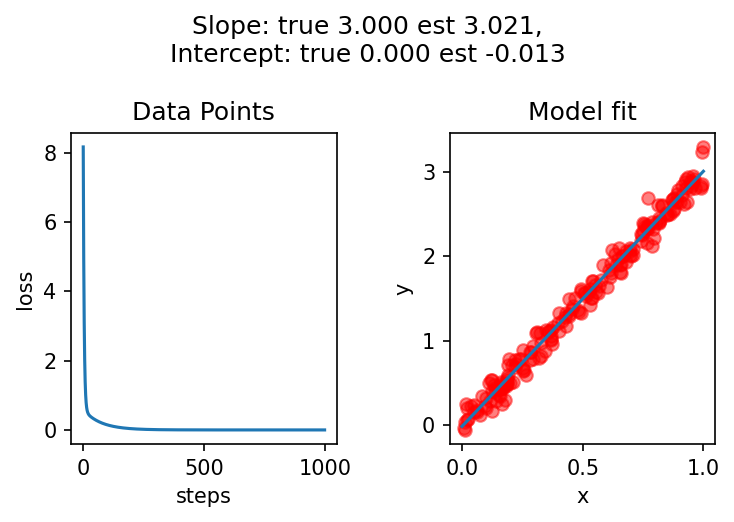

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(5,3.5))

ax1.plot(losses)
ax1.set_title('Data Points')
ax1.set_xlabel('steps')
ax1.set_ylabel('loss')
ax2.scatter(x_1, y, c='r', alpha=0.5)
ax2.set_title('Model fit')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
x_grid = np.linspace(0,1,2)
ax2.plot(x_grid, w_0 + w_1*x_grid)
plt.suptitle(f'Slope: true {slope:.3f} est {w_1:.3f},\nIntercept: true {intercept:.3f} est {w_0:.3f}')
plt.tight_layout()

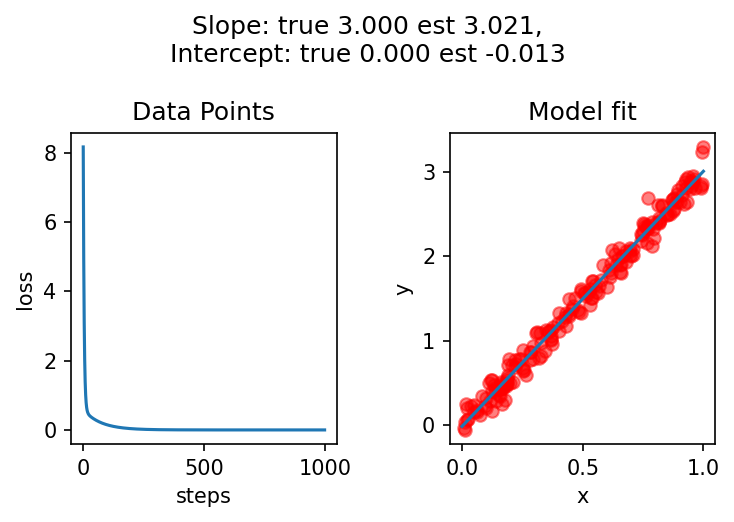

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(5,3.5))
ax1.plot(losses)
ax1.set_title('Data Points')
ax1.set_xlabel('steps')
ax1.set_ylabel('loss')
ax2.scatter(x_1, y, c='r', alpha=0.5)
ax2.set_title('Model fit')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
x_grid = np.linspace(0,1,2)
ax2.plot(x_grid, w_0 + w_1*x_grid)
plt.suptitle(f'Slope: true {slope:.3f} est {w_1:.3f},\nIntercept: true {intercept:.3f} est {w_0:.3f}')
plt.tight_layout()

<!-- --- end solution of exercise --- -->

## Visualizing the loss surface
In this section we will get a better understanding of the loss surface by visualizing it. This is possible because we are working with a simple linear model with two parameters.

You only need to run the following code. Note that the code depends on the random initialization and will give, therefore, different results every time you run it, so we recommend that you run it a few times.

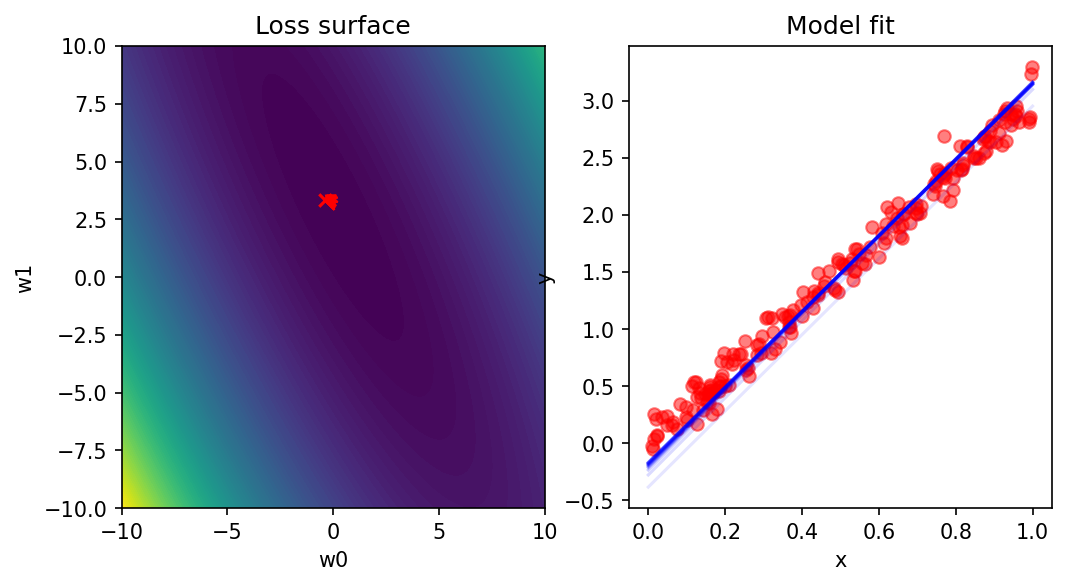

In [68]:
resolution = 100
w0_grid = np.linspace(-10,10,resolution)
w1_grid = np.linspace(-10,10,resolution)
w0_w1_2dgrid = np.stack(np.meshgrid(w0_grid, w1_grid), axis=-1) # shape (resolution,resolution,2)
w0_w1_2dgrid = w0_w1_2dgrid.reshape(-1,2) # shape (resolution**2,2)

y_hat = w0_w1_2dgrid[:,0:1] + w0_w1_2dgrid[:,1:]*x_1[None] # shape (resolution**2,N)
loss = np.mean(loss_fn(y[None], y_hat),axis=-1) # shape (resolution**2,)
loss_2dgrid = loss.reshape(resolution,resolution) # shape (resolution,resolution)

# select a random starting point and compute the (average) gradient at that point to get the direction of steepest descent
w0, w1 = np.random.uniform(-10,10,2)
y_hat = w0 + w1*x_1
dL_dw0_value = np.mean(dL_dw0(y[None], y_hat))
dL_dw1_value = np.mean(dL_dw1(y[None], y_hat, x_1))
gamma = 0.5

# plot the loss surface and the gradient
fig, axs = plt.subplots(ncols=2, figsize=(8,4))
axs[0].contourf(w0_grid, w1_grid, loss_2dgrid, levels=100)
axs[0].set_xlabel('w0')
axs[0].set_ylabel('w1')
axs[0].set_title('Loss surface')
axs[0].scatter(w0, w1, c='r', marker='x')
axs[0].arrow(w0, w1, -gamma*dL_dw0_value, -gamma*dL_dw1_value, width=0.1, color='r')

# plot the data and the current random model, and its improvement in a series of 10 steps
axs[1].scatter(x_1, y, c='r', alpha=0.5)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Model fit')
x_grid = np.linspace(0,1,2)
# create alpha with a linear gradient to make the lines fade out
alpha = np.linspace(0.1,0.5,10)
for i in range(10):
    y_hat = w0 + w1*x_1
    axs[1].plot(x_grid, w0+w1*x_grid, c='b', alpha=alpha[i])
    dL_dw0_value = np.mean(dL_dw0(y[None], y_hat))
    dL_dw1_value = np.mean(dL_dw1(y[None], y_hat, x_1[None]))
    w0_next = w0 - gamma*dL_dw0_value
    w1_next = w1 - gamma*dL_dw1_value
    # plot more gradients
    axs[0].arrow(w0, w1, w0_next-w0, w1_next-w1, width=0.1, color='r')
    w0, w1 = w0_next, w1_next

## Gradient descent with mean squared error equivalent to maximum likelihood minimization
<!-- https://d2l.ai/chapter_linear-regression/linear-regression.html#the-normal-distribution-and-squared-loss -->
Minimizing the mean squared error (MSE) is equivalent to maximum likelihood estimation (MLE) of a linear model under the assumption of additive Gaussian noise which we will show here.

To begin with, we have a simple linear model:

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
y_i = \boldsymbol{w}^T \boldsymbol{x}_i + \epsilon_i,
\tag{1}
\end{equation}
$$

Here, $y_i$ represents the observed output for the $i$-th instance. $\boldsymbol{w}$ is a weight vector, $\boldsymbol{x}_i$ is the $i$-th input vector, and $\epsilon_i$ denotes the additive Gaussian noise, which is assumed to have zero mean and a variance of $\sigma^2$. 

The probability density function of the Gaussian noise is expressed as follows:

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
p(\epsilon_i) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\epsilon_i^2}{2\sigma^2}\right).
\tag{2}
\end{equation}
$$

This Gaussian function models the probability distribution of the noise term in the model. 

The important consequence of our linear model and Gaussian noise assumption is that the conditional distribution of $y_i$ given $\boldsymbol{x}_i$ and $\boldsymbol{w}$ also follows a Gaussian distribution. We express it as:

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
p(y_i|\boldsymbol{x}_i, \boldsymbol{w}) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y_i - \boldsymbol{w}^T \boldsymbol{x}_i)^2}{2\sigma^2}\right).
\tag{3}
\end{equation}
$$

When performing maximum likelihood estimation (MLE), we aim to find the parameters (here, $\boldsymbol{w}$) that maximize the likelihood function, which is the product of the probability densities for each data point in our dataset. The likelihood function is given by:

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
L(\boldsymbol{w}) = \prod_{i=1}^N p(y_i|\boldsymbol{x}_i, \boldsymbol{w}) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(y_i - \boldsymbol{w}^T \boldsymbol{x}_i)^2}{2\sigma^2}\right).
\tag{4}
\end{equation}
$$

Multiplying many small numbers can lead to numerical instability, and taking the derivative of a product can be cumbersome. Taking the logarithm of the likelihood function is a common way to mitigate both of these issues, 
converting products into sums and turning products of derivatives into sums of derivatives. Moreover, since the logarithm is a monotonically increasing function, maximizing the likelihood is equivalent to maximizing the log-likelihood.
The log-likelihood is given by:

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
\ln L(\boldsymbol{w}) = \sum_{i=1}^N \ln p(y_i|\boldsymbol{x}_i, \boldsymbol{w}) = -\frac{N}{2} \ln (2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - \boldsymbol{w}^T \boldsymbol{x}_i)^2.
\tag{5}
\end{equation}
$$

Notice that maximizing the log-likelihood is equivalent to minimizing the negative of it. Also, since the first term does not depend on $\boldsymbol{w}$, we can ignore it during the optimization process. 
Moreover, since $\sigma^2$ is a constant, it does not affect the optimization either and we can ignore it as well.
This leads us to an optimization problem that resembles the mean squared error:

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
\hat{\boldsymbol{w}} = \arg\min_{\boldsymbol{w}} \sum_{i=1}^N (y_i - \boldsymbol{w}^T \boldsymbol{x}_i)^2.
\tag{6}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
\hat{\boldsymbol{w}} = \arg\min_{\boldsymbol{w}} \frac{1}{N}\sum_{i=1}^N (y_i - \boldsymbol{w}^T \boldsymbol{x}_i)^2.
\tag{7}
\end{equation}
$$

Finally, for the sake of completeness, we divide by $N$ to get the 'mean' squared error (MSE), showing that minimizing the MSE is equivalent to performing MLE under our assumptions: